In [30]:
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Getting data ready

In [3]:
bots = pd.read_csv("Datasets/classification_processed/bots/bots.1k.csv")
humans = pd.read_csv("Datasets/classification_processed/humans/humans.1k.csv")
bots["target"] = 1
humans["target"] = 0
data = pd.merge(bots, humans, how='outer')
data = shuffle(data)
targets = data["target"]
data.drop(columns=["source_identity", "screen_name", "target", "likes_per_tweet",
                   "retweets_per_tweet", "favourite_tweet_ratio"], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,user_tweeted,user_retweeted,user_favourited,user_replied,lists_per_user,follower_friend_ratio,tweet_frequency,age_of_account_in_days,sources_count,urls_count,cdn_content_in_kb
0,14,28,11097.595238,34,0.002467,4.179203,12.537894,790.184363,1,19,14.044311
1,8,0,4683.250000,0,0.000576,1.353522,25.762183,1729.025347,1,0,2.708607
2,2,0,2970.500000,2,0.000460,0.862625,7.199581,2162.943924,1,0,1.373360
3,1,1,10737.000000,2,0.000000,1.640120,14.731433,1697.903380,1,0,6.323681
4,2,1,1011.666667,3,0.025895,0.407229,51.668427,345.522431,1,1,2.927933


#### spearman method

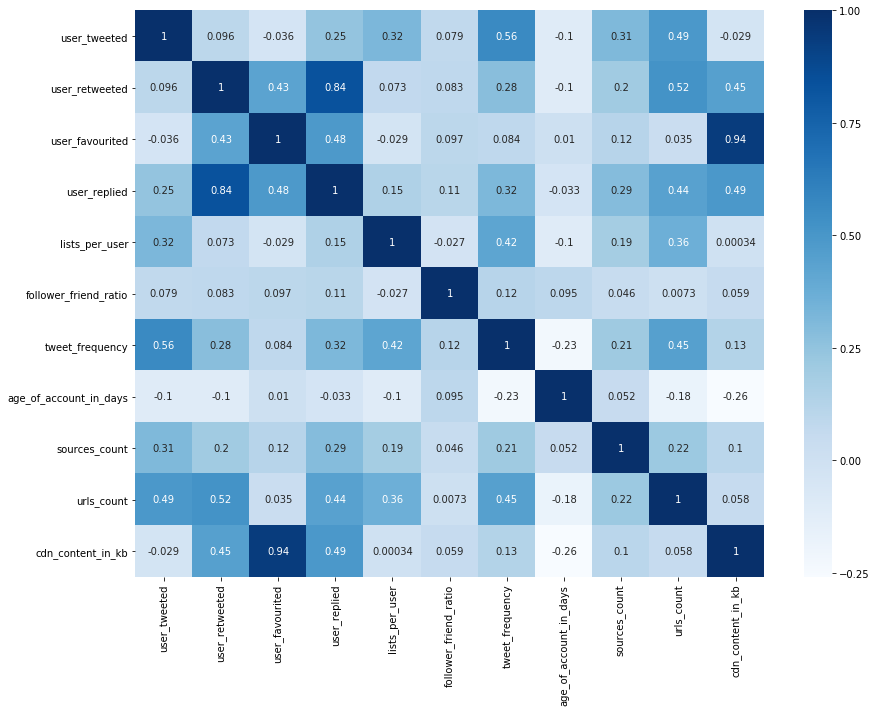

In [4]:
plt.figure(figsize=(13, 10))
sns.heatmap(data.corr(method='spearman'), cmap='Blues', annot=True)
plt.tight_layout()
plt.show()

### Preprocessing data

In [5]:
x = data.values
min_max_scaler = pp.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.018277,0.031638,0.052374,0.038418,0.000039,0.002057,0.005001,0.233107,0.0,0.023573,0.025685
1,0.010444,0.000000,0.022102,0.000000,0.000009,0.000597,0.010330,0.516276,0.0,0.000000,0.004954
2,0.002611,0.000000,0.014019,0.002260,0.000007,0.000344,0.002849,0.647153,0.0,0.000000,0.002512
3,0.001305,0.001130,0.050672,0.002260,0.000000,0.000745,0.005885,0.506889,0.0,0.000000,0.011565
4,0.002611,0.001130,0.004774,0.003390,0.000413,0.000108,0.020771,0.098990,0.0,0.001241,0.005355


#### Train-test split 80:20

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data, targets, test_size=0.2)

### Cross Validation

In [7]:
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10, )
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf, scoring="f1")
    return results


xgb = skfold(X_train, Y_train, xgboost.XGBClassifier())
gnb = skfold(X_train, Y_train, GaussianNB())
rf = skfold(X_train, Y_train, RandomForestClassifier())
svc = skfold(X_train, Y_train, SVC())
ada = skfold(X_train, Y_train, AdaBoostClassifier())
knn = skfold(X_train, Y_train, KNeighborsClassifier())
MLPc = skfold(X_train, Y_train, MLPClassifier())
dic = {'XGB': xgb, 'RandomForest': rf, 'SVC': svc,
       'GaussianNB': gnb, 'adaBoost': ada, 'KNN': knn, 'MLPc': MLPc}

/opt/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/Anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: F

#### F1 score and Standard deviation

In [8]:
def print_acc(results, model):
    print("F1 score of {} is {} and std is {}" .format(
        model, results.mean()*100, results.std()*100))


print_acc(xgb, 'XGBOOST')
print_acc(rf, 'Random Forest')
print_acc(svc, 'SVC ')
print_acc(gnb, 'gnb ')
print_acc(ada, 'adab ')
print_acc(knn, 'knn ')
print_acc(MLPc, 'mlp ')

F1 score of XGBOOST is 76.54308514797766 and std is 5.835562104499575
F1 score of Random Forest is 73.99592510896858 and std is 3.5411949696974414
F1 score of SVC  is 9.827567875497541 and std is 5.539500226352236
F1 score of gnb  is 46.56236384084148 and std is 7.698205854941369
F1 score of adab  is 73.22986923581331 and std is 5.876493521380467
F1 score of knn  is 58.070690630017744 and std is 7.555195424494783
F1 score of mlp  is 59.93236429260854 and std is 6.98015857744745


In [9]:
results = pd.DataFrame(dic).applymap(lambda x: x*100)
results

,XGB,RandomForest,SVC,GaussianNB,adaBoost,KNN,MLPc
0,72.727273,74.666667,18.181818,39.285714,76.315789,59.154930,61.764706
1,84.210526,78.378378,13.953488,51.851852,77.333333,58.333333,64.516129
2,76.056338,70.270270,0.000000,55.172414,76.712329,52.941176,68.852459
3,66.666667,69.565217,4.878049,35.714286,63.888889,62.162162,59.375000
4,78.378378,74.358974,13.953488,49.122807,69.444444,65.671642,65.573770
5,72.727273,70.129870,4.878049,36.363636,68.354430,50.847458,46.428571
6,80.000000,80.519481,9.523810,57.142857,77.922078,67.567568,67.605634
7,87.179487,77.142857,13.953488,52.631579,84.337349,67.647059,58.064516
8,76.056338,72.463768,13.953488,49.122807,68.656716,52.631579,50.000000
9,71.428571,72.463768,5.000000,39.215686,69.333333,43.750000,57.142857


#### Visualize results

Text(0, 0.5, '%accuracy')

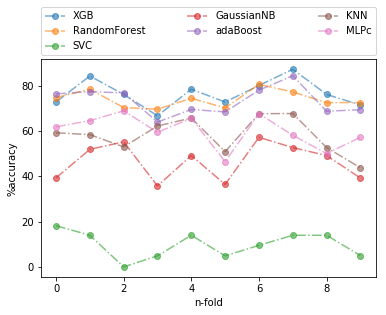

In [10]:
ax = results.plot(**{'linewidth': 1.5, 'linestyle': '-.', 'marker': 'o',
                     'alpha': .6})
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
          mode="expand", borderaxespad=0, ncol=3)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')

### Training models

#### Random Forest

In [11]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}



rfc = RandomForestClassifier()


#### AddaBoost

In [12]:
ac = AdaBoostClassifier()


#### XGBoost

#### Hyperparameter selection

In [43]:
# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}


xgb = xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                            silent=True, nthread=1)


folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb,
                                   scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, Y_train),
                                   verbose=3, random_state=1001
                                   )

# Here we go
random_search.fit(X_train, Y_train)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' %
      (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc',
                    n_jobs=4, cv=skf.split(X_train, Y_train), verbose=3)
grid.fit(X_train, Y_train)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    7.8s finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)

 Best normalized gini score for 5-fold search with 5 parameter combinations:
0.7838897425488023

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   39.7s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.2min


KeyboardInterrupt: 

In [41]:
xgb_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                  colsample_bytree=0.8, gamma=5, learning_rate=0.02, max_delta_step=0,
                                  max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
                                  n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                  silent=True, subsample=0.8)

bst = xgb_model.fit(X_train, Y_train)

predictions = bst.predict(X_test)
pred_proba = bst.predict_proba(X_test)[:, 1]

In [42]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       159
           1       0.84      0.77      0.80        99

   micro avg       0.86      0.86      0.86       258
   macro avg       0.85      0.84      0.85       258
weighted avg       0.86      0.86      0.86       258

